# TSF Task_1: Prediction Using Supervised Machine LearniLearning

## Simple Linear Regression
In this regression task we will predict the percentage of marks that a student is expected to score based upon the number of hours they studied. This is a simple linear regression task as it involves just two variables.

# Author: Nenavath krishna

### Importing Libraries

In [1]:
# importing all relevant libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
sns.set()
%matplotlib inline


from sklearn.linear_model import LinearRegression

# importing a library for hide warnings
import warnings
warnings.filterwarnings('ignore')

### Importing Dataset 

In [2]:
# Reading data from url link
url = "http://bit.ly/w-data"
data = pd.read_csv(url)
data.head(10)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


### Preparing Dataset

In [3]:
#seeing information about the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [4]:
# seeing data description
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [5]:
# checking for missinf values 
data.isnull().sum()

Hours     0
Scores    0
dtype: int64

In [6]:
# dataset into inputs and targets
X = data.iloc[:, :-1].values  
y = data.iloc[:, 1].values  

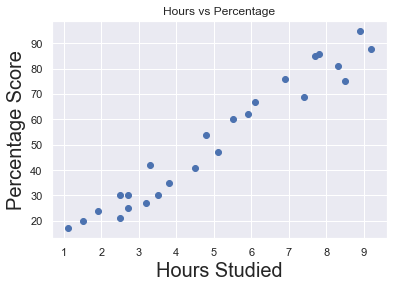

In [7]:
# Plotting the distribution of scores
plt.scatter(X, y)
plt.xlabel('Hours Studied',fontsize=20)
plt.ylabel('Percentage Score',fontsize=20)
plt.title('Hours vs Percentage')
plt.show()

### Checking for Skewness
We check how the dependent variable is distributed. We first create a histogram of the distribution of the ‘Scores’ variable.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001DF77896F88>]],
      dtype=object)

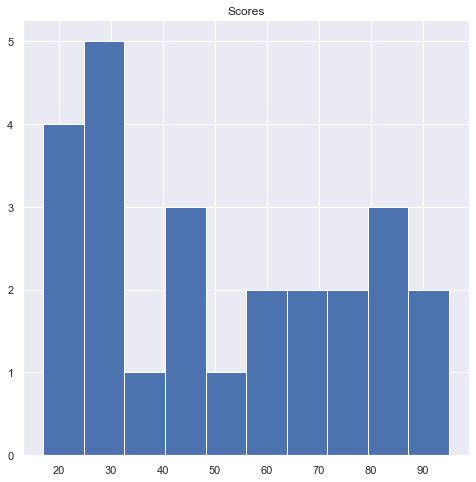

In [8]:
# Checking for Skewness
data.hist(column='Scores',figsize=(8,8))

Now we check for the measure of skewness

In [9]:
data['Scores'].skew()

0.2339646665397317

## Using the Statsmodel for plotting the Best fit line

In [10]:
# implementing ordinary least squares
x1= sm.add_constant(X)
results = sm.OLS(y,x1).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.953
Model:                            OLS   Adj. R-squared:                  0.951
Method:                 Least Squares   F-statistic:                     465.8
Date:                Mon, 04 Jan 2021   Prob (F-statistic):           9.13e-17
Time:                        15:49:03   Log-Likelihood:                -77.514
No. Observations:                  25   AIC:                             159.0
Df Residuals:                      23   BIC:                             161.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.4837      2.532      0.981      0.337      -2.753       7.721
x1             9.7758      0.453     21.583      0.000       8.839      10.713
==============================================================================
Omnibus:                        7.616   Durbin-Watson:                   1.460
Prob(Omnibus):                  0.022   Jarque-Bera (JB):                2.137
Skew:                          -0.216   Prob(JB):                        0.343
Kurtosis:                       1.634   Cond. No.                         13.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Here we are seeing that our p-value is very low which means our input is statistically significant to predict the target

In [11]:
# optimal valves of slope and intercept
results.params

array([2.48367341, 9.77580339])

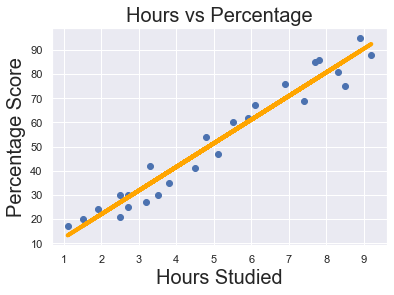

In [12]:
# Plotting the regression line
plt.scatter(X,y)
yhat=9.77580339*X+2.48367341
fig = plt.plot(X,yhat,lw=4,c='orange',label='regression line')
plt.xlabel('Hours Studied',fontsize=20)
plt.ylabel('Percentage Score',fontsize=20)
plt.title('Hours vs Percentage', fontsize=20)
plt.show()

### Train and Test Split

In [13]:
# We will be now splitting our dataset into train and test using train_test_split function
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0) 

In [14]:
# Initializing Linear Regression Model and Fitting the Model
from sklearn.linear_model import LinearRegression  
regressor = LinearRegression()  
regressor.fit(X_train, y_train) 

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [15]:
# coefficient of the model
regressor.coef_

array([9.91065648])

In [16]:
# intercept  of the model
regressor.intercept_

2.018160041434683

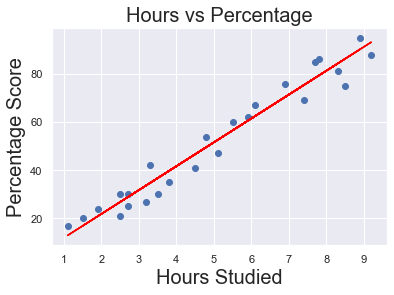

In [17]:
# Plotting the regression line
plt.scatter(X,y)
line=regressor.coef_*X+regressor.intercept_
fig = plt.plot(X,line,c='red',label='regression line')
plt.xlabel('Hours Studied',fontsize=20)
plt.ylabel('Percentage Score',fontsize=20)
plt.title('Hours vs Percentage', fontsize=20)
plt.show()

### prediction for train dataset


In [18]:
regressor.score(X_train, y_train)

0.9515510725211553

the model performs very good on train data and providing about 95% accuracy

### making prediction for test data

In [19]:
y_pred = regressor.predict(X_test)
y_pred

array([16.88414476, 33.73226078, 75.357018  , 26.79480124, 60.49103328])

In [20]:
from sklearn import metrics
metrics.r2_score(y_test,y_pred)

0.9454906892105356

The model providing about 94% accuracy

In [21]:
# Comparing Actual vs Predicted
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df 

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


In [22]:
# You can also test with your own data
hours = [[9.25]]
own_pred = regressor.predict(hours)
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(own_pred[0]))

No of Hours = [[9.25]]
Predicted Score = 93.69173248737538


## Evaluating the model

The final step is to evaluate the performance of algorithm. This step is particularly important to compare how well different algorithms perform on a particular dataset. 
For simplicity here, we have chosen the mean square error. There are many such metrics.



In [23]:
from sklearn import metrics  
print('Mean Absolute Error:', 
      metrics.mean_absolute_error(y_test, y_pred)) 

Mean Absolute Error: 4.183859899002975
